In [311]:
import os
import pickle
import numpy as np
import torchaudio
from pathlib import Path
from vad.vad_lab import VAD

input_pkl = Path(os.getcwd()).parent / "data/input_features-train.pkl"
input_fixed_pkl = Path(os.getcwd()).parent / "data/input_features-train-fixed.pkl"

input_features = {}

try:
    with open(input_pkl, "rb") as pkl:
        input_features = pickle.load(pkl)
except Exception as ex:
    print(ex)



In [312]:
def fix_input_features(input_features):
    durations = []
    fixed_input_features = {}
    inputs, labels = [], []
    stats = []
    for i, (input, label) in enumerate(zip(input_features['inputs'], input_features['labels'])):
        path = Path(os.getcwd()).parent / "audiosegments" / input
        wave, sr = torchaudio.load(path, normalize=True)
        duration = wave.shape[1] / sr
        mean = wave[0].mean().item()
        std = wave[0].std().item()
        if duration >= 3 and duration <= 6:
            if "1568_1_4_66.114_70.014_Train" in input:
                print(duration, input)
            aud = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/{input}"
            aud_dB = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/dBDown/{input}"
            wave, sr = torchaudio.load(aud, normalize=True)
            wave = wave.squeeze() # [c, s] => [s]
            wave = wave * 0.25
            torchaudio.save(aud_dB, wave.unsqueeze(dim=0), sample_rate=16_000, bits_per_sample=16, encoding='PCM_S')
            
            durations.append(duration)
            stats.append([mean, std])
            inputs.append(input)
            labels.append(label)
    fixed_input_features['inputs'] = inputs
    fixed_input_features['labels'] = labels
    return np.array(durations), fixed_input_features, stats

durations, fixed_input_features,  stats = fix_input_features(input_features)
oldf = len(input_features['inputs'])
newf = len(durations)
print(f"extranger length of input_features: {oldf}, fixed length input features: {newf}")

3.9 1568_1_4_66.114_70.014_Train.wav
extranger length of input_features: 12382, fixed length input features: 10216


In [201]:
stats = np.array(stats)

In [219]:
stats[:, 1]

array([0.10176846, 0.09331652, 0.10419286, ..., 0.00595648, 0.0096032 ,
       0.00502728])

In [215]:
stats[0:3, :]

array([[-1.77113016e-05,  1.01768456e-01],
       [-1.03586535e-04,  9.33165178e-02],
       [ 2.73076785e-06,  1.04192860e-01]])

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-0.00284658, -0.00284191, -0.00283723, ...,  0.094946  ,
         0.09495068,  0.09495535]),
 <BarContainer object of 20911 artists>)

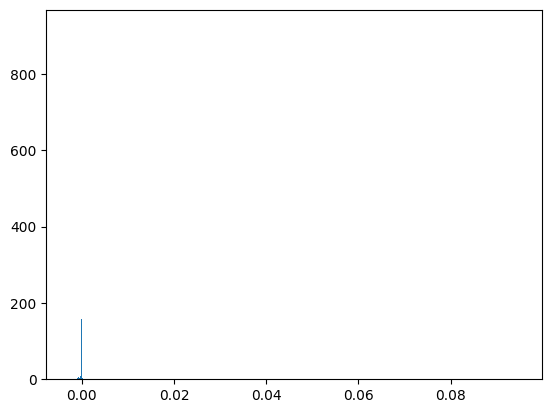

In [221]:
import matplotlib.pyplot as plt
plt.hist(stats[:, 0], bins='auto')

In [310]:

with open(input_fixed_pkl, "wb") as pkl:
    pickle.dump(fixed_input_features, pkl)
    

(array([656., 631., 613., 571., 599., 580., 529., 381., 523., 494., 414.,
        466., 421., 342., 352., 272., 373., 323., 314., 316., 313., 257.,
        255., 221.]),
 array([3.0021875 , 3.12626302, 3.25033854, 3.37441406, 3.49848958,
        3.6225651 , 3.74664062, 3.87071615, 3.99479167, 4.11886719,
        4.24294271, 4.36701823, 4.49109375, 4.61516927, 4.73924479,
        4.86332031, 4.98739583, 5.11147135, 5.23554688, 5.3596224 ,
        5.48369792, 5.60777344, 5.73184896, 5.85592448, 5.98      ]),
 <BarContainer object of 24 artists>)

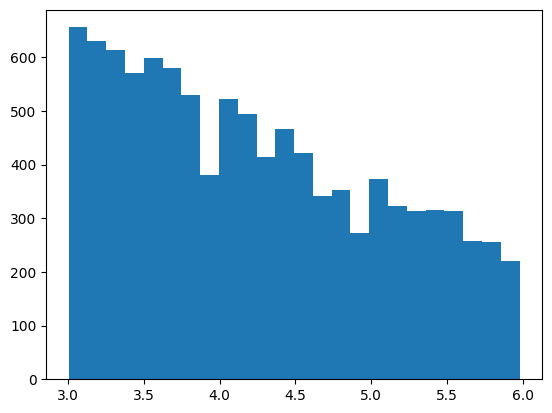

In [72]:
import matplotlib.pyplot as plt
plt.hist(durations, bins='auto')

In [256]:
vad = VAD(minmax=[-100, 100], mapping="OCC")
vad.terms
medium = {"aa": 1, "ae": 2, "ah": 3, "aw": 4, "ay": 5, "b": 6, "ch": 7, "d": 8, "dh": 9, "dx": 10, "eh": 11, "er": 12, "ey": 13, "f": 14, "g": 15, "h#": 16, "hh": 17, "ih": 18, "iy": 19, "jh": 20, "k": 21, "l": 22, "m": 23, "ng": 24, "|": 0, "[UNK]": 25, "[PAD]": 26}

all_labels = []
for label in fixed_input_features['labels']:
    all_labels.extend(label.split())

ids_labels = []
for l in all_labels:
    ids_labels.append(medium[l])

emos_labels = []
for i in ids_labels:
    emos_labels.append(vad.terms[i-1])



In [257]:
np.vstack((ids_labels, emos_labels))

array([['24', '24', '24', ..., '12', '12', '12'],
       ['NEUTRAL', 'NEUTRAL', 'NEUTRAL', ..., 'HOPE', 'HOPE', 'HOPE']],
      dtype='<U21')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'NEUTRAL'),
  Text(1, 0, 'LOVE'),
  Text(2, 0, 'PRIDE'),
  Text(3, 0, 'SATISFACTION'),
  Text(4, 0, 'RESENTMENT'),
  Text(5, 0, 'REPROACH'),
  Text(6, 0, 'PITY'),
  Text(7, 0, 'DISLIKING'),
  Text(8, 0, 'ANGER'),
  Text(9, 0, 'GLOATING'),
  Text(10, 0, 'HOPE'),
  Text(11, 0, 'HAPPY FOR?'),
  Text(12, 0, 'HATE'),
  Text(13, 0, 'JOY'),
  Text(14, 0, 'DISAPPOINTMENT'),
  Text(15, 0, 'LIKING'),
  Text(16, 0, 'GRATITUDE'),
  Text(17, 0, 'RELIEF'),
  Text(18, 0, 'ADMIRATION'),
  Text(19, 0, 'DISTRESS'),
  Text(20, 0, 'GRATIFICATION')])

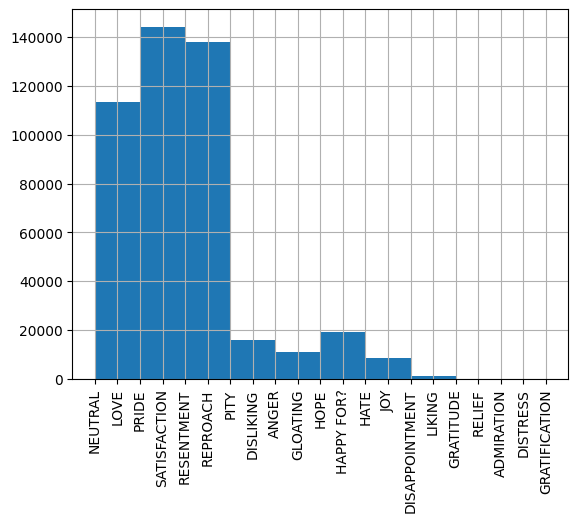

In [268]:
import pandas as pd

ids_labels
ids_labels_df = pd.DataFrame(np.vstack((ids_labels, emos_labels))).T
ids_labels_df[1].hist()
plt.xticks(rotation='vertical')


In [116]:
Path(os.getcwd()).parent / 'data/wadf.pkl'

PosixPath('/Users/beltre.wilton/apps/mspconv_ftlab/data/wadf.pkl')

In [119]:
mspconvs = {}
try:
    with open(Path(os.getcwd()).parent / 'data/mspconvs.pkl', "rb") as pkl:
        mspconvs = pickle.load(pkl)
except Exception as ex:
    print(ex)

In [159]:
part = '1159_1'
wadf[f'{part}_Valence']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,-0.152805
2,0.056068,WAvg,-0.152805
3,0.057015,WAvg,-0.152805
4,0.058019,WAvg,-0.152805
...,...,...,...
93847,395.923000,WAvg,-19.656023
93848,395.923100,WAvg,-19.656023
93849,395.929000,WAvg,-19.352323
93850,395.940000,WAvg,-19.352323


In [160]:
wadf[f'{part}_Dominance']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,0.169524
2,0.057130,WAvg,0.169524
3,0.057412,WAvg,0.169524
4,0.058068,WAvg,0.169524
...,...,...,...
73196,395.923000,WAvg,43.834145
73197,395.923800,WAvg,43.834145
73198,395.931300,WAvg,43.834145
73199,395.939900,WAvg,43.834145


In [161]:
wadf[f'{part}_Arousal']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,NaN
2,0.045000,WAvg,-0.001795
3,0.055045,WAvg,-0.001795
4,0.068794,WAvg,-0.001795
...,...,...,...
64398,395.905400,WAvg,4.807479
64399,395.920100,WAvg,4.807479
64400,395.921000,WAvg,4.807479
64401,395.932300,WAvg,4.807479


In [121]:
mspconvs['2252_2_Arousal'].keys()

dict_keys(['raters', 'annolist', 'time', 'ck_score', 'reps_score', 'reps_scaled', 'annotations'])

In [142]:
mspconvs['1140_3_Dominance']['reps_scaled'][:, 0]

array([0.        , 1.        , 0.93006077, 0.93470333, 0.8795831 ,
       0.33395073])

In [137]:
mspconvs['1140_3_Dominance']['annolist']

array(['7', '10', '13', '14', '17', '19'], dtype=object)

In [147]:
mspconvs['2_1_Arousal']['annotations'][6]

,Time,Annotator,Annotation
0,0.040000,WAvg,-0.004076
1,0.055321,WAvg,-0.004076
2,0.056279,WAvg,-0.004076
3,0.057058,WAvg,-0.004076
4,0.073993,WAvg,-0.004076
...,...,...,...
53848,284.085800,WAvg,41.434158
53849,284.086500,WAvg,41.434158
53850,284.087300,WAvg,42.081218
53851,284.095200,WAvg,42.081218


### TIMIT AREA


In [327]:
def read_text_file(filepath):
    with open(filepath) as f:
        tokens = [line.split()[-1] for line in f]
        return " ".join(tokens)

f = '/Users/beltre.wilton/apps/msp_temp/TIMIT/all_txt/SX308.PHN'
read_text_file(f)

'h# sh ih pcl b ih l dcl iy ng ix z ax m ow s f ae s n ey dx iy ng pcl p r aa s eh s h#'

In [368]:
from pathlib import Path

inputs = []
labels = []
for file in Path('/Users/beltre.wilton/apps/msp_temp/TIMIT/all_waves/train').rglob("*"):
    inputs.append(str(file))
    phn = f'/Users/beltre.wilton/apps/msp_temp/TIMIT/all_txt/train/{file.name.replace(".WAV.wav", ".PHN")}'
    label = read_text_file(phn)
    labels.append(label)



In [369]:
timit_input_features_train = {}
timit_input_features_train['inputs'] = inputs
timit_input_features_train['labels'] = labels

In [370]:
def __save_input_features(dataset_object, name):
    with open(f'/Users/beltre.wilton/apps/mspconv_ftlab/data/{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)

__save_input_features(timit_input_features_train, "timit_input_features-train.pkl")

## Classification Area

In [28]:
import os
import pickle
import numpy as np
import torchaudio
from pathlib import Path
from vad.vad_lab import VAD

input_pkl = Path(os.getcwd()).parent / "data/class_input_features-test.pkl"
input_fixed_pkl = Path(os.getcwd()).parent / "data/class_input_features-test-fixed.pkl"

input_features = {}

try:
    with open(input_pkl, "rb") as pkl:
        input_features = pickle.load(pkl)
except Exception as ex:
    print(ex)

vad = VAD(minmax=[-100, 100], mapping="OCC")


In [29]:
inputs = []
labels = []
class_input_features_test_fixed = {}
for input, label in zip(input_features['inputs'], input_features['labels']):
    inputs.append(input)
    labels.append(vad.terms[label[0]-1])

class_input_features_test_fixed['inputs'] = inputs
class_input_features_test_fixed['labels'] = labels


In [17]:
vad.vad2categorical(0.4, 0.6, -1, k=1, use_plot=False)

([{'term': 'NEUTRAL',
   'index': 24,
   'closest': 0.012328828005937964,
   'v': 0.0,
   'a': 0.0,
   'd': 0.0}],
 {'using_dominance': True})

In [30]:
def __save_input_features(dataset_object, name):
    with open(f'/Users/beltre.wilton/apps/mspconv_ftlab/data/{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)

__save_input_features(class_input_features_test_fixed, "class_input_features_test_fixed.pkl")

In [33]:
vad.terms

array(['ADMIRATION', 'ANGER', 'DISLIKING', 'DISAPPOINTMENT', 'DISTRESS',
       'FEAR', 'GLOATING', 'GRATIFICATION', 'GRATITUDE', 'HAPPY FOR?',
       'HATE', 'HOPE', 'JOY', 'LIKING', 'LOVE', 'PITY', 'PRIDE', 'RELIEF',
       'REMORSE', 'REPROACH', 'RESENTMENT', 'SATISFACTION', 'SHAME',
       'NEUTRAL'], dtype='<U14')

In [46]:
# print("14: ", vad.terms[14])

# for label in class_input_features_test_fixed['labels']:
#     print(label, list(vad.terms).index(label))


class_input_features_test_fixed['inputs']

['47_1_0_0.226_3.934_Test.wav',
 '47_1_1_5.378_7.55_Test.wav',
 '47_1_2_7.874_11.71_Test.wav',
 '47_1_3_12.258_15.55_Test.wav',
 '47_1_4_16.098_21.31_Test.wav',
 '47_1_5_29.73_33.022_Test.wav',
 '47_1_6_33.762_36.062_Test.wav',
 '47_1_7_36.482_39.326_Test.wav',
 '47_1_8_39.97_43.838_Test.wav',
 '47_1_9_44.162_47.518_Test.wav',
 '47_1_10_47.81_51.166_Test.wav',
 '47_1_11_51.49_55.55_Test.wav',
 '47_1_12_55.874_60.734_Test.wav',
 '47_1_13_61.186_65.95_Test.wav',
 '47_1_14_66.146_70.366_Test.wav',
 '47_1_15_70.562_75.55_Test.wav',
 '47_1_16_75.906_78.782_Test.wav',
 '47_1_17_79.202_83.102_Test.wav',
 '47_1_18_83.234_86.878_Test.wav',
 '47_1_19_87.17_93.118_Test.wav',
 '47_1_20_103.394_108.446_Test.wav',
 '47_1_21_115.138_120.254_Test.wav',
 '47_1_22_120.45_123.486_Test.wav',
 '47_1_23_138.338_141.758_Test.wav',
 '47_1_24_141.89_146.942_Test.wav',
 '47_1_25_147.298_152.574_Test.wav',
 '47_1_26_152.93_157.95_Test.wav',
 '47_1_27_165.794_171.166_Test.wav',
 '47_1_28_171.778_177.534_Test.wav'

## Clean data for classification

In [7]:
def __save_input_features(dataset_object, name):
    with open(f'{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)

In [390]:
import pickle

# class_input_features_development_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_development_fixed.pkl"
# class_input_features_test_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_test_fixed.pkl"
# class_input_features_train_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_train_fixed.pkl"

class_input_features_development_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features-development.pkl"
class_input_features_test_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features-test.pkl"
class_input_features_train_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features-train.pkl"

input_features = {}

def load_inputs(input_pkl):
  try:
      with open(input_pkl, "rb") as pkl:
          input_features = pickle.load(pkl)
          return input_features
  except Exception as ex:
      print(ex)


train_input_features = load_inputs(class_input_features_train_fixed)
test_input_features = load_inputs(class_input_features_test_fixed)
dev_input_features = load_inputs(class_input_features_development_fixed)

In [391]:
import os
import numpy as np
import torchaudio
import pickle
from pathlib import Path

class_input_features_development_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_development_fixed.pkl"
class_input_features_test_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_test_fixed.pkl"
class_input_features_train_fixed = "/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_train_fixed.pkl"


input_features = {}

def load_inputs(input_pkl):
  try:
      with open(input_pkl, "rb") as pkl:
          input_features = pickle.load(pkl)
          return input_features
  except Exception as ex:
      print(ex)
    

input_features_development = load_inputs(class_input_features_development_fixed)
input_features_test = load_inputs(class_input_features_test_fixed)
input_features_train = load_inputs(class_input_features_train_fixed)


def fix_input_features(input_features):
    durations = []
    fixed_input_features = {}
    inputs, labels = [], []
    stats = []
    for i, (input, label) in enumerate(zip(input_features['inputs'], input_features['labels'])):
        path = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/{input}"
        wave, sr = torchaudio.load(path, normalize=True)
        duration = wave.shape[1] / sr
        mean = wave[0].mean().item()
        std = wave[0].std().item()
        if duration >= 2.5 and duration <= 5.5:
            durations.append(duration)
            stats.append([mean, std])
            inputs.append(input)
            labels.append(label)
    fixed_input_features['inputs'] = inputs
    fixed_input_features['labels'] = labels
    return np.array(durations), fixed_input_features, stats

oldf = len(dev_input_features['inputs'])
durations, input_features_development,  stats = fix_input_features(dev_input_features)
newf = len(durations)
print(f"old input_features: {oldf}, fixed length input features: {newf}")

oldf = len(test_input_features['inputs'])
durations, input_features_test,  stats = fix_input_features(test_input_features)
newf = len(durations)
print(f"old input_features: {oldf}, fixed length input features: {newf}")

oldf = len(train_input_features['inputs'])
durations, input_features_train,  stats = fix_input_features(train_input_features)
newf = len(durations)
print(f"old input_features: {oldf}, fixed length input features: {newf}")


old input_features: 3427, fixed length input features: 2992
old input_features: 4849, fixed length input features: 4123
old input_features: 12382, fixed length input features: 10797


In [392]:
from vad.vad_lab import VAD

vad = VAD(minmax=[-100, 100], mapping="OCC")

def ids2cat(input_features):
    inputs = []
    labels = []
    input_features_fixed = {}
    for input, label in zip(input_features['inputs'], input_features['labels']):
        inputs.append(input)
        labels.append(vad.terms[label[0]-1])

    input_features_fixed['inputs'] = inputs
    input_features_fixed['labels'] = labels
    
    return input_features_fixed


train_input_features = ids2cat(train_input_features)
test_input_features = ids2cat(test_input_features)
dev_input_features = ids2cat(dev_input_features)


In [393]:
train_input_features['inputs'][:5], train_input_features['labels'][:5]

(['962_1_0_0.162_332.0801875_Train.wav',
  '791_4_0_0.802_3.614_Train.wav',
  '791_4_1_4.194_7.806_Train.wav',
  '791_4_2_8.066_12.446_Train.wav',
  '791_4_3_12.706_16.35_Train.wav'],
 ['RESENTMENT', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL'])

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets



output1 = widgets.Output()
with output1:
    ids_labels_df_train = pd.DataFrame(train_input_features['labels'])
    print("Train\n--------------------------")
    display(ids_labels_df_train.value_counts().sort_values(ascending=False))

output2 = widgets.Output()
with output2:
    print("Eval\n--------------------------")
    ids_labels_df_dev = pd.DataFrame(dev_input_features['labels'])
    display(ids_labels_df_dev.value_counts().sort_values(ascending=False))

output3 = widgets.Output()
with output3:
    print("Test\n--------------------------")
    ids_labels_df_test = pd.DataFrame(test_input_features['labels'])
    display(ids_labels_df_test.value_counts().sort_values(ascending=False))


columns = widgets.HBox([output1, output2, output3])
display(columns)

In [395]:
import random

def down_sampler(input_features, emos, factor=(250, 320)):
    emos_dict = {}
    for input, label in zip(input_features['inputs'], input_features['labels']):
        if len(emos_dict.get(label, [])) == 0:
            emos_dict[label] = []
            emos_dict[label].append(input)
        else:
            emos_dict[label].append(input)

    inputs = []
    labels = []
    # filter by emo
    for emo in emos:
        ranint = random.randint(*factor)
        current = emos_dict[str(emo)]
        if len(current)  < 20:
            continue
        samples = random.sample(current, ranint) if len(current) > ranint else current
        for input, label in zip(input_features['inputs'], input_features['labels']):
            if input in samples:
                inputs.append(input)
                labels.append(label)
            

    return {"inputs": inputs, "labels": labels}


emos = [i[0] for i in ids_labels_df_train.value_counts().index]
train_input_features = down_sampler(train_input_features, emos)

emos = [i[0] for i in ids_labels_df_dev.value_counts().index]
dev_input_features = down_sampler(dev_input_features, emos, factor=(150, 250))

emos = [i[0] for i in ids_labels_df_test.value_counts().index]
test_input_features = down_sampler(test_input_features, emos, factor=(100, 350))

In [378]:
%debug

> /var/folders/08/5rdlnpvd5pq2fc82f0hcxt980000gn/T/ipykernel_5024/1318985411.py(17)down_sampler()
     15     for emo in emos:
     16         ranint = random.randint(*factor)
---> 17         current = emos_dict[str(emo)]
     18         if len(current)  < 20:
     19             continue



ipdb>  len(current)


*** NameError: name 'current' is not defined


ipdb>  ranint


313


ipdb>  emo


21


ipdb>  exit


In [396]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets



output1 = widgets.Output()
with output1:
    ids_labels_df_train = pd.DataFrame(train_input_features['labels'])
    print("Train\n--------------------------")
    display(ids_labels_df_train.value_counts().sort_values(ascending=False))

output2 = widgets.Output()
with output2:
    print("Eval\n--------------------------")
    ids_labels_df_dev = pd.DataFrame(dev_input_features['labels'])
    display(ids_labels_df_dev.value_counts().sort_values(ascending=False))

output3 = widgets.Output()
with output3:
    print("Test\n--------------------------")
    ids_labels_df_test = pd.DataFrame(test_input_features['labels'])
    display(ids_labels_df_test.value_counts().sort_values(ascending=False))


columns = widgets.HBox([output1, output2, output3])
display(columns)

In [397]:
def __save_input_features(dataset_object, name):
    with open(f'/Users/beltre.wilton/apps/mspconv_ftlab/data/{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)


__save_input_features(train_input_features, "class_input_features_train_balanced.pkl")
__save_input_features(dev_input_features, "class_input_features_development_balanced.pkl")
__save_input_features(test_input_features, "class_input_features_test_balanced.pkl")

In [125]:
def plot_audio(wave, path_file, emo):
    display(Audio(data=wave, autoplay=False, rate=16_000, ))
    # Generate some sample data (e.g., a sine wave)
    t = np.linspace(0, len(wave.squeeze()) / 16_000, len(wave.squeeze()))  # Time points
    # waveform = np.sin(t)  # Sine wave
    
    # Plot the waveform
    plt.figure(figsize=(16, 1))  # Set figure size
    plt.plot(t, wave, color='blue', alpha=.5, ms=10)  # Plot waveform
    plt.title(f'{emo} {path_file}')  # Set title
    plt.xlabel('Time')  # Set x-axis label
    plt.ylabel('Amplitude')  # Set y-axis label
    plt.grid(True)  # Add grid
    plt.show()  # Show plot



In [168]:
import torch
import torchaudio

import random
from pathlib import Path

knn_vc = torch.hub.load('bshall/knn-vc', 'knn_vc', prematched=True, trust_repo=True, pretrained=True, device='cpu')


def get_mess_reference():
    mess16k = Path("/Users/beltre.wilton/apps/ftlab_w2v2_ser/rawdata/mess_16k/")
    mess16klist = [file.name for file in mess16k.rglob("*")]
    pick = random.sample(mess16klist, 1)[0][:4]
    return random.sample([str(mess16k / mess) for mess in mess16klist if pick in mess], 1)


def _knnvc(in_wave_file: str, audio_ref: [], emo: str, plot=False):
    # path to 16kHz, single-channel, source waveform
    # src_wav_path = '/content/D.wav'
    # list of paths to all reference waveforms (each must be 16kHz, single-channel) from the target speaker
    # ref_wav_paths = ['/content/D_s.wav', ]

    in_wave, sr = torchaudio.load(in_wave_file) # normalize=True
    refer = []
    for idx, ref in enumerate(audio_ref):
        r, _ = torchaudio.load(ref) # normalize=True
        refer.append(r.squeeze().numpy())
        if plot:
            plot_audio(r.squeeze().numpy(), ref, f"reference#{idx+1}")

    in_wave = torch.from_numpy(in_wave.squeeze().numpy())
    refer = torch.from_numpy(np.array(refer))

    if plot:
        plot_audio(in_wave, in_wave_file, emo)
    
    query_seq = knn_vc.get_features(in_wave)
    matching_set = knn_vc.get_matching_set([refer])

    out_wav = knn_vc.match(query_seq, matching_set, topk=4)

    synth_out_wave_file = f'{in_wave_file.replace(".wav", "_synth.wav")}'

    torchaudio.save(synth_out_wave_file, out_wav[None], sample_rate=16_000, bits_per_sample=16, encoding='PCM_S')

    if plot:
        plot_audio(out_wav, synth_out_wave_file, "SYNTH FILE: ")
    
    return synth_out_wave_file


Using cache found in /Users/beltre.wilton/.cache/torch/hub/bshall_knn-vc_master


Removing weight norm...
[HiFiGAN] Generator loaded with 16,523,393 parameters.
WavLM-Large loaded with 315,453,120 parameters.


RESENTMENT        877
SATISFACTION      772
LOVE              715
PRIDE             475
NEUTRAL           402
REPROACH          325
HOPE               98
PITY               89
ANGER              63
HAPPY FOR?         52
JOY                45
HATE               38
DISLIKING          34
GLOATING           29
LIKING              5
DISAPPOINTMENT      4
GRATITUDE           1
Name: count, dtype: int64

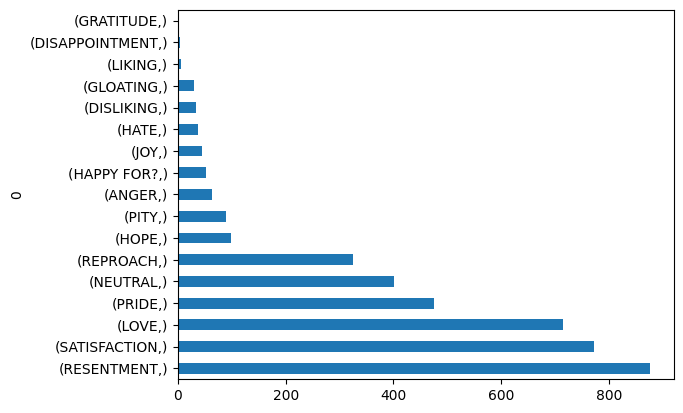

In [165]:
import matplotlib.pyplot as plt



ids_labels_df = pd.DataFrame(train_input_features['labels'])
ids_labels_df.value_counts().plot( kind="barh")

# ids_labels_df = pd.DataFrame(test_input_features['labels'])
# ids_labels_df.value_counts().plot(kind="barh")

# ids_labels_df = pd.DataFrame(train_input_features['labels'])
# ids_labels_df.value_counts().plot(kind="barh")
ids_labels_df.value_counts()

In [164]:
emos_dict = {}
for input, label in zip(train_input_features['inputs'], train_input_features['labels']):
    if len(emos_dict.get(label, [])) == 0:
        emos_dict[label] = []
        emos_dict[label].append(input)
    else:
        emos_dict[label].append(input)

In [185]:
import random
import torchaudio
from IPython.display import display, Audio
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# HOPE               98
# PITY               89
# ANGER              63
# HAPPY FOR?         52
# JOY                45
# HATE               38
# DISLIKING          34
# GLOATING           29


N_SYNTH = {"HOPE": 300, "PITY": 310, "ANGER": 340, "HAPPY FOR?": 320, "JOY": 315, "HATE": 300, "DISLIKING": 300, "GLOATING": 250 }
synth_input_features = {}
inputs = []
labels = []
for emo, N in N_SYNTH.items():
    for n in tqdm(range(N), desc=f"sintetizando {N} {emo}  ⏳...", total=N, ncols=120):
        elements = random.sample(emos_dict[emo], 1)
        for elem in elements:
            audio = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/{elem}"
            try:
                synth_out_wave_file = _knnvc(audio, get_mess_reference(), emo)
                inputs.append(str(Path(synth_out_wave_file).name))
                labels.append(emo)
            except Exception as ex:
                continue

synth_input_features['inputs'] = inputs
synth_input_features['labels'] = labels


sintetizando 250 GLOATING  ⏳...: 100%|███████████████████████████████████████████████| 250/250 [02:33<00:00,  1.63it/s]


In [197]:
# inputs = []
# labels = []
# for input, label in zip(synth_input_features['inputs'], synth_input_features['labels']):
#     train_input_features['inputs'].append(input)
#     train_input_features['labels'].append(label)


inputs = []
labels = []
dropped = {}
for input, label in zip(train_input_features['inputs'], train_input_features['labels']):
    if label not in ('LIKING', 'DISAPPOINTMENT', 'GRATITUDE'):
        inputs.append(input)
        labels.append(label)

dropped['inputs'] = inputs
dropped['labels'] = labels
train_input_features = dropped


with open('/Users/beltre.wilton/apps/mspconv_ftlab/data/class_input_features_train_synth.pkl', "wb") as pkl:
    pickle.dump(train_input_features, pkl)


RESENTMENT      877
SATISFACTION    772
LOVE            715
PRIDE           475
NEUTRAL         402
ANGER           396
HOPE            393
PITY            392
HAPPY FOR?      362
JOY             355
HATE            333
DISLIKING       328
REPROACH        325
GLOATING        272
Name: count, dtype: int64

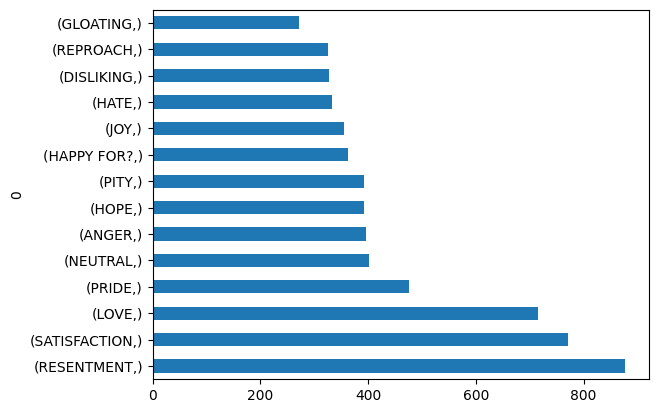

In [196]:
import matplotlib.pyplot as plt


ids_labels_df = pd.DataFrame(train_input_features['labels'])
ids_labels_df.value_counts().plot( kind="barh")
ids_labels_df.value_counts()

## Mean Vote Area

In [1]:
import json

targets_mean_vote = {}
with open('../data/targets_mean_vote.json', "r") as tgt:
    targets_mean_vote = json.load(tgt)

In [25]:
for tgt in targets_mean_vote.items():
    print(tgt[0], len(tgt[1]['rangos']))

MSP-Conversation_0021.wav 468
MSP-Conversation_0023.wav 0
MSP-Conversation_0035.wav 145
MSP-Conversation_0043.wav 0
MSP-Conversation_0046.wav 369
MSP-Conversation_0047.wav 0
MSP-Conversation_0053.wav 420
MSP-Conversation_0054.wav 318
MSP-Conversation_0055.wav 162
MSP-Conversation_0061.wav 294
MSP-Conversation_0067.wav 312
MSP-Conversation_0079.wav 0
MSP-Conversation_0081.wav 481
MSP-Conversation_0083.wav 272
MSP-Conversation_0087.wav 0
MSP-Conversation_0088.wav 201
MSP-Conversation_0094.wav 408
MSP-Conversation_0101.wav 399
MSP-Conversation_0103.wav 0
MSP-Conversation_0110.wav 0
MSP-Conversation_0114.wav 0
MSP-Conversation_0125.wav 534
MSP-Conversation_0130.wav 605
MSP-Conversation_0135.wav 80
MSP-Conversation_0140.wav 529
MSP-Conversation_0147.wav 0
MSP-Conversation_0153.wav 0
MSP-Conversation_0156.wav 338
MSP-Conversation_0160.wav 0
MSP-Conversation_0166.wav 0
MSP-Conversation_0167.wav 145
MSP-Conversation_0172.wav 0
MSP-Conversation_0180.wav 196
MSP-Conversation_0183.wav 0
MSP-Conve

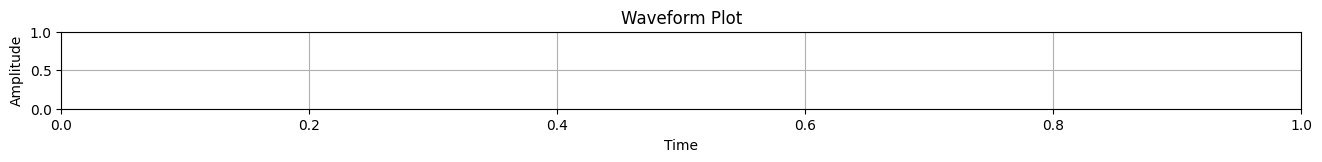

In [10]:
from IPython.display import display, Audio
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import torchaudio

wave, sr = torchaudio.load('/Users/beltre.wilton/Downloads/SER-Datasets/MSP-Conversation-1.1/Audio/MSP-Conversation_0690.wav')

# Generate some sample data (e.g., a sine wave)
t = np.linspace(0, round(len(wave[0]) / 16_000) , round(len(wave[0]) / 16_000))  # Time points
waveform = np.sin(t)  # Sine wave

# Plot the waveform
plt.figure(figsize=(16, 1))  # Set figure size
plt.plot(t, wave[0][::], color='blue')  # Plot waveform
plt.title('Waveform Plot')  # Set title
plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Amplitude')  # Set y-axis label
plt.grid(True)  # Add grid
plt.show()  # Show plot

In [26]:
print(targets_mean_vote['MSP-Conversation_0678.wav']['rangos'])


[[141.06, 141.32], [141.62, 142.08], [142.16, 143.92], [143.96, 145.98], [146.0, 146.48], [147.02, 147.14], [147.46, 147.6], [148.56, 148.82], [148.84, 150.08], [150.52, 150.68], [151.82, 151.96], [152.92, 153.6], [154.62, 155.24], [155.76, 160.68], [161.3, 167.22], [168.28, 173.88], [176.0, 178.58], [179.3, 182.38], [183.56, 185.7], [186.54, 191.86], [192.62, 192.72], [192.8, 196.12], [196.32, 198.08], [198.28, 199.2], [199.28, 202.92], [203.02, 204.22], [206.0, 215.58], [215.64, 223.88], [223.88, 224.24], [224.98, 231.28], [232.72, 233.52], [233.96, 235.38], [236.0, 236.1], [236.58, 237.72], [238.62, 240.38], [240.6, 241.9], [241.96, 243.4], [243.4, 244.38], [244.42, 244.72], [244.72, 245.88], [246.04, 248.02], [248.12, 249.34], [249.98, 251.38], [251.62, 252.68], [253.3, 255.98], [256.06, 259.54], [259.58, 260.56], [261.68, 265.1], [266.34, 266.98], [267.14, 273.46], [273.9, 276.1], [276.98, 280.86], [281.08, 289.52], [289.78, 292.04], [292.42, 292.84], [292.94, 293.66], [293.72, 29

In [ ]:
 try:
    with open(path_file, "rb") as pkl:
        input_features = pickle.load(pkl)
        print(f"inputs:{len(input_features['inputs'])}, labels:{len(input_features['labels'])}")
except Exception as ex:
    print(ex)